In [1]:
!pip install ktrain
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 6.3 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 52.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 41.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.38.0-py3-none-any.whl size=25319964 sha256=420c

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
trainSet = pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv')
testSet =  pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Test.csv')

In [3]:
!pip install bnltk
!pip install bnlp-toolkit==4.0.0.dev4

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [4]:
# #Tokenizer
# from bnlp import NLTKTokenizer
# bnltk = NLTKTokenizer()

# #for Train Set
# for i in range(0,trainSet.shape[0]):
#     text = bnltk.word_tokenize(trainSet['Data'][i])
#     trainSet['Data'][i] = str(text)
# #For Test Set   
# for i in range(0,testSet.shape[0]):
#     text = bnltk.word_tokenize(testSet['Data'][i])
#     testSet['Data'][i] = str(text)

In [5]:
from sklearn.model_selection import train_test_split
train = trainSet['Data'].values.tolist()
test = testSet['Data'].values.tolist()
train_cluster_id = trainSet['Label'].tolist()
test_cluster_id = testSet['Label'].tolist()

In [6]:
X_train = train
y_train = train_cluster_id
X_test = test
y_test = test_cluster_id

In [7]:
X_train

['মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোমায় কোথায় পামু. আমি তোমার সাথে যাবু. গান কমু তোমার মতো গলি ঘুরমু.',
 'এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায় এই তিনটা পুলিশ কে তরে সবার সামনে মেরে পেলা দরকার ',
 'ভাই আপনার কথাই যাদু রয়েছে',
 'উওরটা আমার অনেক ভাল লেগেছে ',
 'আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ? প্রাইভেট কার নিয়ে ?',
 'যেমন : পরীক্ষার রেজাল্টের সময় , বিভিন্ন ব্যানিজ্যিক প্রচার ইত্যাদি ',
 'বিশ্বনন্দিত বিশ্ব জয় করা ইসলামের পাখিদের কোরআনের পাখিদের কোন খবর নাই আরিফ অব্যয় বোদার বয় সিঙ্গেল বয় জাতি হিসেবে বাঙালি বর্তমানে কত মুরুক্ষ এটা তারই প্রমাণ ঝাড়ু মার তোর কপালে',
 'সাপ্তাহিক মুসুল্লিদের কথাটাও তুলে ধরলে ভাই , চোখ খুলে দিছো ',
 'আমি ভেবেছিলাম গালিগালাজ করে সেরা ছেলে সে ? গালিবয়',
 'তুমি রেপারই হও , ডাক্তার হওয়ার দরকার নাই তোমার ',
 'লেসবো মেয়েটার ফ্রেন্ড টা অনেক কিউট ',
 'আচ্ছা চারপাশে অন্ধকার কেন ? লাইট টা শুধু আপনাদের টেবিলে পড়ছে কেন',
 'আল্লাহ আপনাকে হায়াত দারাজ করুন এবং সবার মাঝে সুস্থ ভাবে বেঁচে থাকার তৌফিক দান করুক',
 'ভাই এতো সুন্দর ভিডিও বানান 

In [8]:
import ktrain
from ktrain import text
MODEL_NAME = 'xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [9]:

y_train = [str(x) for x in train_cluster_id]
y_test = [str(x) for x in test_cluster_id]


In [10]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 37
	99percentile : 47


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 15
	95percentile : 36
	99percentile : 44


In [11]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=10)
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1258/1258 [==============================] - 965s 749ms/step - loss: 0.9581 - accuracy: 0.5373 - val_loss: 0.8117 - val_accuracy: 0.6469
Epoch 2/10
1258/1258 [==============================] - 937s 745ms/step - loss: 0.8005 - accuracy: 0.6507 - val_loss: 0.7380 - val_accuracy: 0.6835
Epoch 3/10
1258/1258 [==============================] - 936s 744ms/step - loss: 0.9135 - accuracy: 0.5668 - val_loss: 1.0026 - val_accuracy: 0.4937
Epoch 4/10
1258/1258 [==============================] - 937s 745ms/step - loss: 0.7634 - accuracy: 0.6661 - val_loss: 0.7076 - val_accuracy: 0.6961
Epoch 5/10
1258/1258 [==============================] - 937s 745ms/step - loss: 0.6785 - accuracy: 0.7081 - val_loss: 0.6999 - val_accuracy: 0.7043
Epoch 6/10
1258/1258 [==============================] - 937s 744ms/step - loss: 0.5919 - accuracy: 0.7520 - val_loss: 0.7277 - val_accuracy: 0.7018
Epoch 7/10
1258/1258 [===========================

In [12]:
learner.validate(class_names=t.get_classes()) 

50/50 [==============================] - 10s 152ms/step
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       361
           1       0.77      0.78      0.78       654
           2       0.78      0.77      0.78       571

    accuracy                           0.71      1586
   macro avg       0.69      0.68      0.68      1586
weighted avg       0.71      0.71      0.71      1586



array([[179, 100,  82],
       [102, 513,  39],
       [ 74,  56, 441]])

In [13]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

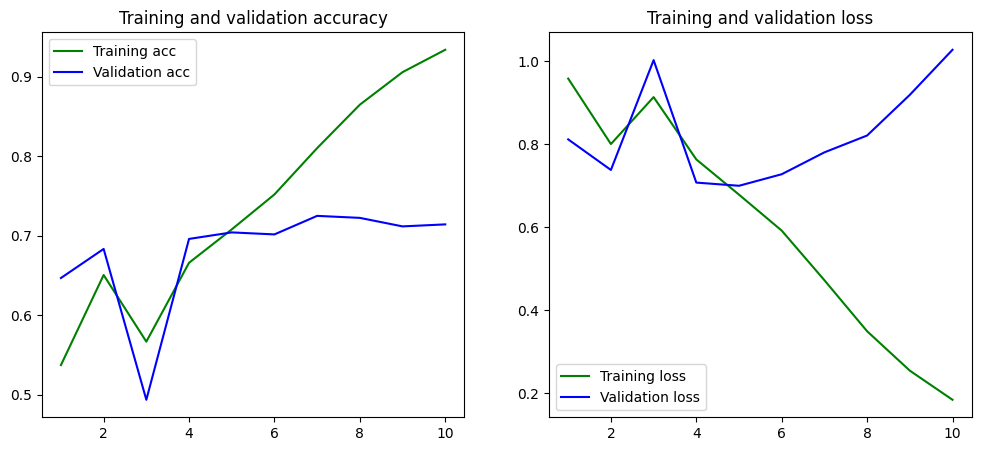

In [14]:
PlotGraph(history)